<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc" style="margin-top: 1em;"><ul class="toc-item"><li><span><a href="#Data-visualisation" data-toc-modified-id="Data-visualisation-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Data visualisation</a></span><ul class="toc-item"><li><ul class="toc-item"><li><span><a href="#Useful-Imports" data-toc-modified-id="Useful-Imports-1.0.1"><span class="toc-item-num">1.0.1&nbsp;&nbsp;</span>Useful Imports</a></span></li></ul></li><li><span><a href="#European-unemployement-rates" data-toc-modified-id="European-unemployement-rates-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>European unemployement rates</a></span><ul class="toc-item"><li><span><a href="#Importing" data-toc-modified-id="Importing-1.1.1"><span class="toc-item-num">1.1.1&nbsp;&nbsp;</span>Importing</a></span></li><li><span><a href="#Cleaning-the-dataset" data-toc-modified-id="Cleaning-the-dataset-1.1.2"><span class="toc-item-num">1.1.2&nbsp;&nbsp;</span>Cleaning the dataset</a></span></li><li><span><a href="#Matching-the-topoJSON-and-our-dataset" data-toc-modified-id="Matching-the-topoJSON-and-our-dataset-1.1.3"><span class="toc-item-num">1.1.3&nbsp;&nbsp;</span>Matching the topoJSON and our dataset</a></span></li><li><span><a href="#Visualization" data-toc-modified-id="Visualization-1.1.4"><span class="toc-item-num">1.1.4&nbsp;&nbsp;</span>Visualization</a></span></li><li><span><a href="#Comparing-switzerland-to-rest-of-Europe" data-toc-modified-id="Comparing-switzerland-to-rest-of-Europe-1.1.5"><span class="toc-item-num">1.1.5&nbsp;&nbsp;</span>Comparing switzerland to rest of Europe</a></span></li></ul></li><li><span><a href="#Swiss-unemployment-rates" data-toc-modified-id="Swiss-unemployment-rates-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>Swiss unemployment rates</a></span><ul class="toc-item"><li><span><a href="#Map-visualisation" data-toc-modified-id="Map-visualisation-1.2.1"><span class="toc-item-num">1.2.1&nbsp;&nbsp;</span>Map visualisation</a></span></li><li><span><a href="#Without-people-who-already-have-a-job-and-are-looking-for-a-new-one" data-toc-modified-id="Without-people-who-already-have-a-job-and-are-looking-for-a-new-one-1.2.2"><span class="toc-item-num">1.2.2&nbsp;&nbsp;</span>Without people who already have a job and are looking for a new one</a></span></li><li><span><a href="#Other-correlations" data-toc-modified-id="Other-correlations-1.2.3"><span class="toc-item-num">1.2.3&nbsp;&nbsp;</span>Other correlations</a></span><ul class="toc-item"><li><span><a href="#Unemployment-rate-among-young-people" data-toc-modified-id="Unemployment-rate-among-young-people-1.2.3.1"><span class="toc-item-num">1.2.3.1&nbsp;&nbsp;</span>Unemployment rate among young people</a></span></li><li><span><a href="#Long-term-unemployed-person-rate" data-toc-modified-id="Long-term-unemployed-person-rate-1.2.3.2"><span class="toc-item-num">1.2.3.2&nbsp;&nbsp;</span>Long-term unemployed person rate</a></span></li></ul></li></ul></li><li><span><a href="#Swiss-unemployment-rates-and-distinction-between-Swiss-and-foreign-workers." data-toc-modified-id="Swiss-unemployment-rates-and-distinction-between-Swiss-and-foreign-workers.-1.3"><span class="toc-item-num">1.3&nbsp;&nbsp;</span>Swiss unemployment rates and distinction between Swiss and foreign workers.</a></span><ul class="toc-item"><li><ul class="toc-item"><li><span><a href="#import-the-amstat-dataset-and-perform-a-quick-clean-up-/-analysis" data-toc-modified-id="import-the-amstat-dataset-and-perform-a-quick-clean-up-/-analysis-1.3.0.1"><span class="toc-item-num">1.3.0.1&nbsp;&nbsp;</span>import the amstat dataset and perform a quick clean up / analysis</a></span></li><li><span><a href="#draw-the-map-for-unemployement-by-nationality-by-country" data-toc-modified-id="draw-the-map-for-unemployement-by-nationality-by-country-1.3.0.2"><span class="toc-item-num">1.3.0.2&nbsp;&nbsp;</span>draw the map for unemployement by nationality by country</a></span></li><li><span><a href="#Refine-the-analysis-by-adding-the-differences-between-age-groups" data-toc-modified-id="Refine-the-analysis-by-adding-the-differences-between-age-groups-1.3.0.3"><span class="toc-item-num">1.3.0.3&nbsp;&nbsp;</span>Refine the analysis by adding the differences between age groups</a></span></li></ul></li></ul></li></ul></li></ul></div>

# Data visualisation

### Useful Imports

In [1]:
import os
import pandas as pd
import json
import folium
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import json
from pprint import pprint
import math

pd.options.mode.chained_assignment = None  # default='warn', Mutes warnings when copying a slice from a DataFrame.
folium.__version__ == '0.5.0'

True

## European unemployement rates
### Importing

In [2]:
# Constants
DATA_FOLDER = "datas/"
EUROSTAT = "eurostat.csv"
# The period of the dataset that we consider
QUARTER = '2017Q2'

In [3]:
def import_data(path):
    """
    Imports the data from the path of the dataset, will put it in a format with which we can work with.
    That is, it will make it such that we have the countries as a unique index.
    
    @params: 
    - path : the path to the dataset
    """
    df = pd.read_csv(path,index_col=None, header=0,thousands=',')
    # We unstack the time to have a unique row per country
    tmp = df.set_index(['TIME','GEO','SEX','AGE','CITIZEN','UNIT'])['Value'].unstack('TIME')
    # To avoid hierarchical columns
    tmp.columns.name = ''
    toReturn_df = tmp.reset_index()

    return toReturn_df.set_index('GEO')

In [4]:
eurostat_df = import_data(DATA_FOLDER+EUROSTAT)
eurostat_df.head()

,SEX,AGE,CITIZEN,UNIT,2015Q1,2015Q2,2015Q3,2015Q4,2016Q1,2016Q2,2016Q3,2016Q4,2017Q1,2017Q2
GEO,,,,,,,,,,,,,,
Austria,Total,From 15 to 74 years,Total,Percentage,5.8,5.8,5.6,5.7,6.3,6.1,6.1,5.6,6.0,5.4
Belgium,Total,From 15 to 74 years,Total,Percentage,8.8,8.4,8.2,8.7,8.3,7.9,7.9,7.2,7.7,7.0
Bulgaria,Total,From 15 to 74 years,Total,Percentage,10.6,9.9,8.3,7.9,8.6,8.1,7.0,6.7,6.9,6.3
Croatia,Total,From 15 to 74 years,Total,Percentage,17.8,15.5,15.4,16.1,15.4,12.8,10.9,13.4,14.1,11.0
Cyprus,Total,From 15 to 74 years,Total,Percentage,17.7,14.6,14.7,12.7,14.1,12.1,13.0,12.9,13.6,10.6


### Cleaning the dataset
We then want to clean the data, we have two potential problems :
* Some columns give no information as they contain the same value for all rows (e.g. ```CITIZEN``` is set to ```Total``` for all rows)
* Some rows concern aggregation of multiple european countries : ```[Euro area (18 countries)', 'Euro area (19 countries)','European Union (15 countries)', 'European Union (27 countries)','European Union (28 countries)']``` which are not really interesting for us.

In [5]:
def clean_data(df):
    """
    Deletes the columns with no variance and drops the rows concerning the european conglomerates.
    
    @params:
    - df : the dataframe to clean
    """
    df = df[get_useful_columns(df)]
    
    # We get rid of the rows that concern agglomeration of European countries
    useless_rows = [r for r in df.index if 'Euro' in r]
    df.drop(useless_rows,inplace=True)
    return df

def get_useful_columns(df):
    """ Returns columns that are interesting, get rids of those that only contain the same value in all rows
    
    @params:
    - df : the dataframe on which we wish to filter columns
    """
    useful_cols = []
    print("We discard those columns :")
    for c in df.columns:
        range_values = df[c].unique()
        if(len(range_values) > 1):
            useful_cols.append(c)
        else:
            print("\t{} has only one value : '{}'".format(c,range_values[0]))
    return useful_cols

In [6]:
eurostat_df = clean_data(eurostat_df)
# We keep only the most interesting quarter
eurostat_df = eurostat_df[[QUARTER]]
eurostat_df.head()

We discard those columns :
	SEX has only one value : 'Total'
	AGE has only one value : 'From 15 to 74 years'
	CITIZEN has only one value : 'Total'
	UNIT has only one value : 'Percentage'


,2017Q2
GEO,
Austria,5.4
Belgium,7.0
Bulgaria,6.3
Croatia,11.0
Cyprus,10.6


### Matching the topoJSON and our dataset
We first compare the names of the json file and the eurostat dataset. Note that here we have decided to give the full experimental process that we went through in order to explain our choices, therefore the code is not encapsulated as neatly as it could but it makes a reader more aware of what we are doing.

In [7]:
def get_country_sets(json_data,df):
    """
    Returns the set of countries from the topoJSON and the dataframe
    
    @params:
    - json_data : the loaded date of the topoJSON
    - df : the dataframe which contains the countries from the dataset as index
    """
    df_countries = set(df.index)
        
    json_countries = []
    for g in json_data["objects"]['europe']['geometries']:
        json_countries.append(g['properties']['NAME'])
        
    json_countries = set(json_countries)
    return json_countries,df_countries

In [8]:
json_data = json.load(open("topojson/europe.topojson.json"))

json_countries,eurostat_countries = get_country_sets(json_data,eurostat_df)

print("In eurostat not in topo: \n\t",eurostat_countries-json_countries)
print("In topo not in eurostat: \n\t",json_countries-eurostat_countries)

In eurostat not in topo: 
	 {'Former Yugoslav Republic of Macedonia, the', 'Germany (until 1990 former territory of the FRG)'}
In topo not in eurostat: 
	 {'Belarus', 'Germany', 'Holy See (Vatican City)', 'Monaco', 'Albania', 'Israel', 'Montenegro', 'Liechtenstein', 'Republic of Moldova', 'Ukraine', 'Azerbaijan', 'Bosnia and Herzegovina', 'Georgia', 'Faroe Islands', 'Russia', 'The former Yugoslav Republic of Macedonia', 'Armenia', 'Serbia', 'Andorra', 'San Marino'}


A lot of countries in the JSON are not part of the eurostat data.
> "the 28 EU-Member States, three EFTA countries (except for Liechtenstein), and two acceding and candidate countries, i.e. the former Yugoslav Republic of Macedonia and Turkey. Data for Cyprus refer only to the areas of Cyprus controlled by the Government of the Republic of Cyprus." [link to metadata](http://ec.europa.eu/eurostat/cache/metadata/en/lfsa_esms.htm)

We rename Germany and The Former Yugoslav Republic of Macedonia. For the remaining countries we need to add the countries that are in the topoJSON but not in the dataset in order to use the ```choropleth``` function. We decide to add them with a value set to the median over the "quarter" that we look at, so that the quantile distribution computed by ```choropleth``` is not too biased by those values.

In [9]:
eurostat_df = eurostat_df.reset_index()
eurostat_df.replace("Germany (until 1990 former territory of the FRG)","Germany",inplace=True)
eurostat_df.replace("Former Yugoslav Republic of Macedonia, the","The former Yugoslav Republic of Macedonia",inplace=True)
eurostat_df = eurostat_df.set_index('GEO')

In [10]:
def add_missing_countries(json_countries,df,quarter=QUARTER):
    """
    Completes the dataframe with countries from the topoJSON that we are missing in the dataset.
    They will be added with the median of the quarter as unemployement rate not to mess with 
    the quantile distribution made by the choropleth map
    
    @params:
    - json_countries : the set of country names in the topoJSON
    - df : the dataframe to which we want to add the values
    - quarter : the name of the column to use to compute the mean
    """
    # We recompute the eurostat countries now that we have modified some country names to be compliant
    df_countries = set(df.index)
    added_countries = json_countries-df_countries
    
    match = []
    m = df[quarter].median()
    for c in added_countries:
        my_dict = {'GEO':c}
        for c in eurostat_df.columns:
            if c != 'index' : my_dict[c] = m
        match.append(my_dict)
    
    completion = pd.DataFrame(match).set_index('GEO')
    complete = pd.concat([eurostat_df,completion])
    return complete,added_countries

In [11]:
complete,added_countries = add_missing_countries(json_countries,eurostat_df)
complete.tail()

,2017Q2
GEO,
Russia,6.4
Armenia,6.4
Serbia,6.4
Andorra,6.4
San Marino,6.4


### Visualization
We will use the ```choropleth``` function and let it compute the gradient. ** In order to make sure that the 'dummy' countries we added are not interpreted as valid employement values we will also add a white mask over them to show that they were missing from the eurostat dataset **

In [12]:
def mark_unmatched_countries(feature,added_countries):
    """
    Will create a black mask with opacity 0.5 for countries 
    that we added to the dataframe but were not in the topoJSON
    
    @params:
    - added_countries : the list of countries that we added artificially
    """
    fill_op = 0
    if feature['properties']['NAME'] in added_countries:
        fill_op = 1
    return {
        'fillOpacity': fill_op,
        'fillColor': '#ffffff'
    }

In [13]:
# Get the map for EUROPE
m_europe = folium.Map([50,23], tiles='cartodbpositron', zoom_start=4)
country_geo_path = 'topojson/europe.topojson.json'

geo_json = json.load(open(country_geo_path))

# Get the choropleth map
m_europe.choropleth(geo_data=geo_json,
                    data=complete.reset_index(),
                    topojson="objects.europe",
                    columns=['GEO',QUARTER],
                    key_on='feature.properties.NAME',
                    fill_color='YlGn', fill_opacity=0.8, line_opacity=0.2,
                    legend_name='Unemployement rate (%)',
                    name='Unemployement Rates')

# Get the mask for the added countries
folium.TopoJson(data=geo_json,object_path="objects.europe",
                style_function=lambda feature : mark_unmatched_countries(feature,added_countries),
                name='Unmatched Countries').add_to(m_europe)

# Add a Layer Controling tool to be able to hide the masks
folium.LayerControl().add_to(m_europe)
m_europe

In [14]:
m_europe.save('Eurostat_employement_rate.html')

You can access the resulting map [here](https://render.githubusercontent.com/view/Eurostat_employement_rate.html). 

### Comparing switzerland to rest of Europe
In order to make the visualization more intuitive to compare switzerland we will display the relative difference of the unemployement rate of each european country compared to switzerland.

In [15]:
ch_unemployement_rate = eurostat_df.at['Switzerland',QUARTER]
eurostat_df['relative_diff_w_CH'] = eurostat_df['2017Q2'].map(lambda x : x - ch_unemployement_rate)

# Then we complete with the mean again for the countries that were absent from the data
complete_relative,added_countries_relative = add_missing_countries(json_countries,eurostat_df)

In [16]:
m_europe_relative = folium.Map([50,23], tiles='cartodbpositron', zoom_start=4)
country_geo_path = 'topojson/europe.topojson.json'

geo_json = json.load(open(country_geo_path))

# Get the choropleth map
m_europe_relative.choropleth(geo_data=geo_json,
                    data=complete_relative.reset_index(),
                    topojson="objects.europe",
                    columns=['GEO','relative_diff_w_CH'],
                    key_on='feature.properties.NAME',
                    threshold_scale=[-2,0,4.5,9,13.5,18],
                    fill_color='YlGnBu', fill_opacity=0.8, line_opacity=0.2,
                    legend_name='Unemployement rate relative to Switzerland(%)',
                    name='Unemployement Rates')

# Get the mask for the added countries
folium.TopoJson(data=geo_json,object_path="objects.europe",
                style_function=lambda feature : mark_unmatched_countries(feature,added_countries_relative),
                name='Unmatched Countries').add_to(m_europe_relative)

# Add a Layer Controling tool to be able to hide the masks
folium.LayerControl().add_to(m_europe_relative)
m_europe_relative

In [17]:
m_europe_relative.save('Eurostat_employement_rate_relative.html')

Notice that we have decided on our own scale because we wanted to show both the countries that do better than Switzerland and the countries that do worse. Therefore we needed a color for countries with a negative value and a scale of colors for countries with positive values. You can access the map [here](https://render.githubusercontent.com/view/Eurostat_employement_rate_relative.html)

## Swiss unemployment rates
### Map visualisation

We want to visualise the unemployment rate at the level of swiss cantons. The Swiss Confederation defines the rates as the number of people looking for a job divided by the size of the active population (scaled by 100). 

From the website <a href="https://www.amstat.ch/v2/index.jsp?lang=fr">Anstat</a>, we export in CSV the data that correspond to our study. We have choosen the last data that correspond to September 2017. 

In [57]:
unemployed_df = pd.read_csv(DATA_FOLDER + 'unemployment_rate.csv', header=None)
unemployed_df = unemployed_df[1:]
unemployed_df = unemployed_df.drop(28) # Total value
unemployed_df.head()

,0,1,2,3,4,5,6,7,8,9,...,14,15,16,17,18,19,20,21,22,23
1,,Mesures,Taux de chômage,Taux de chômage des jeunes,Chômeurs inscrits,Chômeurs jeunes,Chômeurs de longue durée,Demandeurs d'emploi,Demandeurs d'emploi non chômeurs,Demandeurs d'emploi non chômeurs - PET,...,Taux de chômage des jeunes,Chômeurs inscrits,Chômeurs jeunes,Chômeurs de longue durée,Demandeurs d'emploi,Demandeurs d'emploi non chômeurs,Demandeurs d'emploi non chômeurs - PET,Demandeurs d'emploi non chômeurs - autres,Demandeurs d'emploi non chômeurs - Reconversio...,Demandeurs d'emploi non chômeurs - gain interm...
2,Zurich,NaN,3.3,3.7,27'225,3'420,4'753,34'156,6'931,295,...,3.7,27'225,3'420,4'753,34'156,6'931,295,2'563,89,3'984
3,Berne,NaN,2.4,2.8,13'658,2'003,2'336,18'385,4'727,323,...,2.8,13'658,2'003,2'336,18'385,4'727,323,2'153,109,2'142
4,Lucerne,NaN,1.7,2.1,3'885,664,453,6'756,2'871,403,...,2.1,3'885,664,453,6'756,2'871,403,1'076,258,1'134
5,Uri,NaN,0.6,0.5,112,15,13,257,145,19,...,0.5,112,15,13,257,145,19,56,3,67


In [58]:
unemployed_df.iloc[[0]].values.flatten().tolist()[:13]

[' ',
 'Mesures',
 'Taux de chômage',
 'Taux de chômage des jeunes',
 'Chômeurs inscrits',
 'Chômeurs jeunes',
 'Chômeurs de longue durée',
 "Demandeurs d'emploi",
 "Demandeurs d'emploi non chômeurs",
 "Demandeurs d'emploi non chômeurs - PET",
 "Demandeurs d'emploi non chômeurs - autres",
 "Demandeurs d'emploi non chômeurs - Reconversion/perfectionnement",
 "Demandeurs d'emploi non chômeurs - gain intermédiaire"]

We see that the column that interest us is the "Taux de chômage" and the "Canton" column.

In [59]:
# Selecting the rows and columns.
unemployment_rate = unemployed_df[[0,2]][1:]
# Rename the column
unemployment_rate.columns = ['canton', 'unemployment']

unemployment_rate.head()

,canton,unemployment
2,Zurich,3.3
3,Berne,2.4
4,Lucerne,1.7
5,Uri,0.6
6,Schwyz,1.7


We open the topojson provided for overlay in order to see how it is structured.

In [21]:
geo_json_data = json.load(open('topojson/ch-cantons.topojson.json'))
cantons_json = geo_json_data['objects']['cantons']['geometries']
cantons_json[:2]

[{'arcs': [[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]],
  'id': 'ZH',
  'properties': {'name': 'Zürich'},
  'type': 'Polygon'},
 {'arcs': [[[10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22], [23], [24]],
   [[25, 26]],
   [[27]],
   [[28, 29]]],
  'id': 'BE',
  'properties': {'name': 'Bern/Berne'},
  'type': 'MultiPolygon'}]

We check if the positions of canton in our dataframe and in the topo_json are the same even if their name are not identical. 

In [61]:
len("Appenzell Rhodes-Extérieures")

28

In [63]:
for i in range(0, len(unemployment_rate)):
    print("{:^29}=>{:^29}".format(unemployment_rate.iloc[i].canton, cantons_json[i]['properties']['name']))

           Zurich            =>           Zürich            
            Berne            =>         Bern/Berne          
           Lucerne           =>           Luzern            
             Uri             =>             Uri             
           Schwyz            =>           Schwyz            
           Obwald            =>          Obwalden           
           Nidwald           =>          Nidwalden          
           Glaris            =>           Glarus            
            Zoug             =>             Zug             
          Fribourg           =>          Fribourg           
           Soleure           =>          Solothurn          
         Bâle-Ville          =>         Basel-Stadt         
        Bâle-Campagne        =>      Basel-Landschaft       
         Schaffhouse         =>        Schaffhausen         
Appenzell Rhodes-Extérieures =>   Appenzell Ausserrhoden    
Appenzell Rhodes-Intérieures =>    Appenzell Innerrhoden    
           St-Gall      

In [64]:
cantons = []
for i in range(0, len(unemployment_rate)):
    cantons.append({
        'id': cantons_json[i]['id'],
        'unemployment': unemployment_rate.iloc[i].unemployment,
        })
cantons = pd.DataFrame.from_dict(cantons)
cantons.head()

,id,unemployment
0,ZH,3.3
1,BE,2.4
2,LU,1.7
3,UR,0.6
4,SZ,1.7


In [24]:
cantons[['unemployment']] = cantons[['unemployment']].apply(pd.to_numeric)

Our dataframe is well formated so we are able to make the Choropleth map. 

In [25]:
# Get the map for Switzerland
m_swiss = folium.Map([47,8.2], tiles='cartodbpositron', zoom_start=7.5)

# Get the choropleth map
m_swiss.choropleth(geo_data=geo_json_data,
                    data=cantons[['id', 'unemployment']],
                    topojson="objects.cantons",
                    columns=['id','unemployment'],
                    key_on='feature.id',
                    fill_color='YlGn', fill_opacity=0.8, line_opacity=0.2,
                    legend_name='Unemployment rate (%)',
                    name='Unemployment Rates')
m_swiss

In [26]:
m_swiss.save('Swiss_employment_rate.html')

You can access the resulting map [here](http://localhost:8888/files/ADA-killer-team/03%20-%20Interactive%20Viz/Swiss_employment_rate.html). 

We see that the swiss unemployment rate between cantons is diverse. We clearly see that cantons in the west are more concerned than at the east par of Switzerland.

### Without people who already have a job and are looking for a new one

Now we want to not count in our statistics people who already have a job and are looking for a new one.

We know that the Swiss Confederation defines the rates we have just plotted as the number of people looking for a job divided by the size of the active population (scaled by 100). Our dataset provides the number of people looking for a job so we are able to compute the active population. 
This number will help us to calculate the rate of unemployement without people who already have a job.

In [75]:
# Selecting the rows and columns.
unemployment = unemployed_df[[0,2,7,8]][1:]
# Rename the column
unemployment.columns = ['canton', 'unemployment_rate', 'job_seeker', 'employed_job_seeker']

unemployment.sort_values(by=['canton']).head()

,canton,unemployment_rate,job_seeker,employed_job_seeker
16,Appenzell Rhodes-Extérieures,1.7,866,343
17,Appenzell Rhodes-Intérieures,0.7,102,40
20,Argovie,2.9,15'145,4'461
3,Berne,2.4,18'385,4'727
14,Bâle-Campagne,2.8,5'540,1'458


In [76]:
# Clean apostrophes
unemployment['job_seeker'] = unemployment['job_seeker'].str.replace("'" , '')
unemployment['employed_job_seeker'] = unemployment['employed_job_seeker'].str.replace("'" , '')

# Make numbers format
unemployment[['unemployment_rate']] = unemployment[['unemployment_rate']].apply(pd.to_numeric)
unemployment[['job_seeker']] = unemployment[['job_seeker']].apply(pd.to_numeric)
unemployment[['employed_job_seeker']] = unemployment[['employed_job_seeker']].apply(pd.to_numeric)

# Create column "active_population"
unemployment['active_population'] = 100*unemployment['job_seeker']/unemployment['unemployment_rate']

# Create column "active_population"
unemployment['unemployed_job_seeker'] = unemployment['job_seeker'] - unemployment['employed_job_seeker']
unemployment['unemployment_rate_part'] = 100*unemployment['unemployed_job_seeker']/unemployment['active_population']

unemployment.head()

,canton,unemployment_rate,job_seeker,employed_job_seeker,active_population,unemployed_job_seeker,unemployment_rate_part
2,Zurich,3.3,34156,6931,1.035030e+06,27225,2.630358
3,Berne,2.4,18385,4727,7.660417e+05,13658,1.782932
4,Lucerne,1.7,6756,2871,3.974118e+05,3885,0.977575
5,Uri,0.6,257,145,4.283333e+04,112,0.261479
6,Schwyz,1.7,2229,774,1.311176e+05,1455,1.109690


In [77]:
unemployment.describe()

,unemployment_rate,job_seeker,employed_job_seeker,active_population,unemployed_job_seeker,unemployment_rate_part
count,26.000000,26.000000,26.000000,2.600000e+01,26.000000,26.000000
mean,2.523077,7447.076923,2325.192308,2.605623e+05,5121.884615,1.653373
std,1.274773,8242.250770,2043.258848,2.475992e+05,6362.825708,1.016526
min,0.600000,102.000000,40.000000,1.457143e+04,62.000000,0.261479
25%,1.700000,2253.750000,760.500000,5.988295e+04,1196.000000,1.032558
50%,2.500000,5579.000000,1662.500000,2.166558e+05,3628.000000,1.514831
75%,3.075000,8513.000000,3344.000000,2.960792e+05,5105.500000,2.058778
max,5.200000,34156.000000,7494.000000,1.035030e+06,27225.000000,4.105104


In [78]:
cantons = []
for i in range(0, len(unemployment)):
    cantons.append({
        'id': cantons_json[i]['id'],
        'unemployment': unemployment.iloc[i].unemployment_rate_part,
        })
cantons = pd.DataFrame.from_dict(cantons)
cantons.head()

,id,unemployment
0,ZH,2.630358
1,BE,1.782932
2,LU,0.977575
3,UR,0.261479
4,SZ,1.109690


In [79]:
cantons[['unemployment']] = cantons[['unemployment']].apply(pd.to_numeric)

Our dataframe is well formated so we are able to make the Choropleth map. 

In [80]:
# Get the map for Switzerland
m_swiss = folium.Map([47,8.2], tiles='cartodbpositron', zoom_start=7.5)

# Get the choropleth map
m_swiss.choropleth(geo_data=geo_json_data,
                    data=cantons[['id', 'unemployment']],
                    topojson="objects.cantons",
                    columns=['id','unemployment'],
                    key_on='feature.id',
                    fill_color='YlGn', fill_opacity=0.8, line_opacity=0.2,
                    legend_name='Unemployment rate without people who already have a job (%)',
                    name='Unemployment Rates')
m_swiss

In [81]:
m_swiss.save('Swiss_employment_rate_segmented.html')

You can access the resulting map [here](http://localhost:8888/files/ADA-killer-team/03%20-%20Interactive%20Viz/Swiss_employment_rate_segmented.html). 

For the unemployment without people who already have a job and are looking for a new one, we see a distribution that looks like the one previously observed. The west is very affected by the unemployment without people who already have a job, in addition with the Tessin canton in the south.  We see that the scale is now lower than the previous map, from 0.3% to 1.4% instead of 0.6% to 5.2% previously. This distribution is therefore less heterogeneous than the one before.

### Other correlations
We repeat this with different choices of categories to see how selecting different metrics can lead to different interpretations of the same data.

#### Unemployment rate among young people
We are interested to see the unemployment rate among young people in each canton and compare them. 

In [33]:
# Selecting the rows and columns.
unemployment_rate_young = unemployed_df[[3]][1:]
# Rename the column
unemployment_rate_young.columns = ['unemployment_rate_young']
# Make numbers format
unemployment_rate_young[['unemployment_rate_young']] = unemployment_rate_young[['unemployment_rate_young']].apply(pd.to_numeric)

cantons = []
for i in range(0, len(unemployment_rate_young)):
    cantons.append({
        'id': cantons_json[i]['id'],
        'unemployment': unemployment_rate_young.iloc[i].unemployment_rate_young,
        })
cantons = pd.DataFrame.from_dict(cantons)
cantons.head()

,id,unemployment
0,ZH,3.7
1,BE,2.8
2,LU,2.1
3,UR,0.5
4,SZ,1.6


In [34]:
# Get the map for Switzerland
m_swiss = folium.Map([47,8.2], tiles='cartodbpositron', zoom_start=7.5)

# Get the choropleth map
m_swiss.choropleth(geo_data=geo_json_data,
                    data=cantons[['id', 'unemployment']],
                    topojson="objects.cantons",
                    columns=['id','unemployment'],
                    key_on='feature.id',
                    fill_color='YlGn', fill_opacity=0.8, line_opacity=0.2,
                    legend_name='Unemployment rate among young people (%)',
                    name='Unemployment Rates')
m_swiss

In [35]:
m_swiss.save('Swiss_employment_rate_young.html')

You can access the resulting map [here](http://localhost:8888/files/ADA-killer-team/03%20-%20Interactive%20Viz/Swiss_employment_rate_young.html). 

The distribution resembles those observed above. The west and south are particularly concerned by the unemployment among young people. The scale is between 0.4% and 6.2% this rate is heterogeneous between cantons. 

#### Long-term unemployed person rate
A long-term unemployed person is anyone who has been notified to a regional employment office for at least one year. Reduced chances of finding a job, lost wages in a new job, sometimes accompanied by health or social problems, these are only some of the consequences that usually affect the people concerned.
The longer the involuntary unemployment phase lasts, the more it will have negative consequences on certain economic, social and personal aspects. This is why the fight against long-term unemployment is of paramount importance for the Unemployment Insurance.

In [82]:
# Selecting the rows and columns.
unemployment_long = unemployed_df[[6]][1:]
# Rename the column
unemployment_long.columns = ['unemployment_long']
# Make numbers format
unemployment_long['unemployment_long'] = unemployment_long['unemployment_long'].str.replace("'" , '')
unemployment_long[['unemployment_long']] = unemployment_long[['unemployment_long']].apply(pd.to_numeric)

cantons = []
for i in range(0, len(unemployment_rate_young)):
    cantons.append({
        'id': cantons_json[i]['id'],
        'unemployment': 100*unemployment_long.iloc[i].unemployment_long/unemployment.iloc[i].active_population,
        })
cantons = pd.DataFrame.from_dict(cantons)
cantons.head()

,id,unemployment
0,ZH,0.459214
1,BE,0.304944
2,LU,0.113988
3,UR,0.030350
4,SZ,0.144145


In [83]:
# Get the map for Switzerland
m_swiss = folium.Map([47,8.2], tiles='cartodbpositron', zoom_start=7.5)

# Get the choropleth map
m_swiss.choropleth(geo_data=geo_json_data,
                    data=cantons[['id', 'unemployment']],
                    topojson="objects.cantons",
                    columns=['id','unemployment'],
                    key_on='feature.id',
                    fill_color='YlGn', fill_opacity=0.8, line_opacity=0.2,
                    legend_name='Long-term unemployed person rate (%)',
                    name='Unemployment Rates')
m_swiss

In [38]:
m_swiss.save('Swiss_employment_rate_long_term.html')

You can access the resulting map [here](http://localhost:8888/files/ADA-killer-team/03%20-%20Interactive%20Viz/Swiss_employment_rate_long_term.html). 

We observe that this type of unemployment particularly affects some cantons west of Switzerland: Neuchatel and Jura.

## Swiss unemployment rates and distinction between Swiss and foreign workers.

####  import the amstat dataset and perform a quick clean up / analysis 

After closely looking at the amstat website and the data they proposed we decided to choose for this specific question the data from september 2017 for the "taux de chomage" (unemployement rate). We couldn't find a way to get a file with both the informations we needed in this question so we exported 2 csv files. On containing the "taux de chomage" by canton and by nationality, the other one containing the "taux de chomage" by canton and age groups. We estimated that the "taux de chomage"approximated by amstat would be better than any approximation we could make from the raw data itself (flat number of unemployed people, etc..). 

Before importing the 2 files in here we add to do a little preprocessing to change the encoding and remove extra header and footer from the file. For that we used our code editor which was Visual Studio Code in this case but any code editor would have worked.

In [39]:
# import the data
unemployement_df_nationality = pd.read_csv(DATA_FOLDER + 'unemployement-by-nationality-and-region.csv')
unemployement_df_age_groups = pd.read_csv(DATA_FOLDER + 'unemployement-by-age-and-region.csv')

unemployement_df_nationality.head()

,Canton,Nationalité,Mois,Septembre 2017,Total
0,,,Mesures,Taux de chômage,Taux de chômage
1,Zurich,Etrangers,NaN,5.3,5.3
2,Zurich,Suisses,NaN,2.5,2.5
3,Berne,Etrangers,NaN,5.5,5.5
4,Berne,Suisses,NaN,1.8,1.8


As we can observe above the data were very messy and the next step wasto clean clean and transform them into nice and easy to use dataframes.

In [40]:
# We start by removing useless cols
unemployement_df_nationality = unemployement_df_nationality.drop(
    unemployement_df_nationality.columns[2], 1)
unemployement_df_age_groups  = unemployement_df_age_groups.drop(
    unemployement_df_age_groups .columns[2], 1)
unemployement_df_nationality = unemployement_df_nationality.drop(
    unemployement_df_nationality.columns[-1], 1)
unemployement_df_age_groups  = unemployement_df_age_groups.drop(
    unemployement_df_age_groups .columns[-1], 1)

# we also rename the second column to be able to concat
unemployement_df_nationality = unemployement_df_nationality.rename(
    columns = {unemployement_df_nationality.columns[1]:"Category"})
unemployement_df_age_groups = unemployement_df_age_groups.rename(
    columns = {unemployement_df_age_groups.columns[1]:"Category"})

# Set hierarchical index on the first 2 cols
unemployement_df_nationality = unemployement_df_nationality.set_index(
    unemployement_df_nationality.columns[0:2].tolist())
unemployement_df_age_groups = unemployement_df_age_groups.set_index(
    unemployement_df_age_groups.columns[0:2].tolist())

# We can now rename the only column left with its first row value
unemployement_df_nationality = unemployement_df_nationality.rename(
    columns = {unemployement_df_nationality.columns[0]:unemployement_df_nationality.iloc[0,0]})
unemployement_df_age_groups = unemployement_df_age_groups.rename(
    columns = {unemployement_df_age_groups.columns[0]:unemployement_df_age_groups.iloc[0,0]})

# We remove the useless first row
unemployement_df_nationality = unemployement_df_nationality.iloc[1:]
unemployement_df_age_groups = unemployement_df_age_groups.iloc[1:]

# We convert each str value to numeric:
unemployement_df_nationality = unemployement_df_nationality.apply(pd.to_numeric, errors='coerce')
unemployement_df_age_groups = unemployement_df_age_groups.apply(pd.to_numeric, errors='coerce')

In [41]:
unemployement_df_nationality.head()

Taux de chômage
Canton  Category                  
Zurich  Etrangers              5.3
        Suisses                2.5
Berne   Etrangers              5.5
        Suisses                1.8
Lucerne Etrangers              3.9

In [42]:
unemployement_df_age_groups.head()

Taux de chômage
Canton Category                  
Zurich 15-19 ans              3.9
       20-24 ans              3.7
       25-29 ans              3.5
       30-34 ans              3.7
       35-39 ans              3.8

We end up with 2 clean dataframe that we can use to create our different layers on our map. Before being able to use these data on the map we need to check that our JSON file canton name match well with the one we have here from amstat. To do so we load the JSON file and compare the canton name all together.

In [43]:
canton_geo_path = r'topojson/ch-cantons.topojson.json'
geo_json = json.load(open(canton_geo_path))

In [44]:
# gather the list of canton name from the JSON file
json_cantons = [x['properties']['name'] for x in geo_json['objects']['cantons']['geometries']]
df_cantons = unemployement_df_nationality.index.get_level_values(0).unique()
# quickly looking at the 2 it seems that they are ordered in the same way
# we confirm that by checking only the different one at same index
for i,_ in enumerate(json_cantons):
    if json_cantons[i] != df_cantons[i]:
        print ('{} != {}'.format(df_cantons[i], json_cantons[i]))
        
# we also check that the canton name are the same in both df just in case:
unemployement_df_nationality.index.get_level_values(0).unique() == unemployement_df_age_groups.index.get_level_values(0).unique()

Zurich != Zürich
Berne != Bern/Berne
Lucerne != Luzern
Obwald != Obwalden
Nidwald != Nidwalden
Glaris != Glarus
Zoug != Zug
Soleure != Solothurn
Bâle-Ville != Basel-Stadt
Bâle-Campagne != Basel-Landschaft
Schaffhouse != Schaffhausen
Appenzell Rhodes-Extérieures != Appenzell Ausserrhoden
Appenzell Rhodes-Intérieures != Appenzell Innerrhoden
St-Gall != St. Gallen
Grisons != Graubünden/Grigioni
Argovie != Aargau
Thurgovie != Thurgau
Tessin != Ticino
Valais != Valais/Wallis


array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True], dtype=bool)

We confirm that each canton are sorted in the same order in both dataframe as well as in the json file so we just need to put the same name in the json exported variable as in our 2 dataframe to properly match the different canton name.

In [45]:
# set the geo_json canton name to match our df
for i,_ in enumerate(geo_json['objects']['cantons']['geometries']):
    geo_json['objects']['cantons']['geometries'][i]['properties']['name'] = df_cantons[i]

# final check
json_cantons = [x['properties']['name'] for x in geo_json['objects']['cantons']['geometries']]
json_cantons == df_cantons

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True], dtype=bool)

As displayed above we can clearly see that now the canton name from our dataframe and the json variable are matching.

####  draw the map for unemployement by nationality by country

To show the map for unemployement by nationality by country, we decided to display 2 layers and use an interactive map to be able to switch from one to the other. This was a better alternative that to make 2 different map.

To display the first layer of the unemployment rate regarding the "Etrangers" we took a subset of our dataframe that kept only the relevent data. For that we used a temporary df holding the dataframe with reset_index. 

In [84]:
df = unemployement_df_nationality.reset_index()
etranger_df = df[df.Category == 'Etrangers']
etranger_df.head()

,Canton,Category,Taux de chômage
0,Zurich,Etrangers,5.3
2,Berne,Etrangers,5.5
4,Lucerne,Etrangers,3.9
6,Uri,Etrangers,2.1
8,Schwyz,Etrangers,3.4


We do the exact same operation to extract the swiss rate.

In [47]:
swiss_df = df[df.Category == 'Suisses']
swiss_df.head()

,Canton,Category,Taux de chômage
1,Zurich,Suisses,2.5
3,Berne,Suisses,1.8
5,Lucerne,Suisses,1.3
7,Uri,Suisses,0.4
9,Schwyz,Suisses,1.2


We can now display the first layer of the map using the data from this sliced dataframe.

In [48]:
# create the folium map
m_ch = folium.Map(location=[46.818188, 8.227511999999933], tiles='cartodbpositron', zoom_start=8)

# put stranger rate as a first layer
m_ch.choropleth(geo_data=geo_json,
                    data=etranger_df,
                    topojson="objects.cantons",
                    columns=['Canton', 'Taux de chômage'],
                    key_on='properties.name',
                    fill_color='PuBu', fill_opacity=0.7, line_opacity=0.2,
                    legend_name='Unemployement rate (Stranger) (%)',
                    name='Unemployement Rates (Stranger)')

# put siwss rate as a second layer
m_ch.choropleth(geo_data=geo_json,
                    data=swiss_df,
                    topojson="objects.cantons",
                    columns=['Canton', 'Taux de chômage'],
                    key_on='properties.name',
                    fill_color='OrRd', fill_opacity=0.7, line_opacity=0.2,
                    legend_name='Unemployement rate (Swiss) (%)',
                    name='Unemployement Rates (Swiss)')

# add a layercontrol to be able to switch between the 2 layers
folium.LayerControl().add_to(m_ch)

# display the map
m_ch

From this map we observe that the west side canton seems to be the one with the biggest unemployement rate both for the stranger and swiss people. We also observe that the unemployement rate for the strangers get to much higher range up to 9% against a maximum of only 4.8% for swiss people. 

Now to better observe the difference between the stranger unemployement rate and the swiss one, we can simply display on another the map with the difference between the 2 ratio.

In [49]:
# create a diff df with the difference in ratio
diff_df = etranger_df.reset_index().drop(['index', 'Category'], 1)
diff_df['Taux de chômage'] = etranger_df.reset_index()['Taux de chômage'] - swiss_df.reset_index()['Taux de chômage']
diff_df.head()

,Canton,Taux de chômage
0,Zurich,2.8
1,Berne,3.7
2,Lucerne,2.6
3,Uri,1.7
4,Schwyz,2.2


In [50]:
# create the folium map
m_ch_diff = folium.Map(location=[46.818188, 8.227511999999933], tiles='cartodbpositron', zoom_start=8)

# put stranger rate as a first layer
m_ch_diff.choropleth(geo_data=geo_json,
                    data=diff_df,
                    topojson="objects.cantons",
                    columns=['Canton', 'Taux de chômage'],
                    key_on='properties.name',
                    fill_color='YlGn', fill_opacity=0.8, line_opacity=0.2,
                    legend_name='Unemployement rate diff(%)',
                    name='Unemployement Rates diff')

# display the map
m_ch_diff

Now we can clearly observe on this map that the canton of Jura seems to be the worst in term of difference between unemployement rate for stranger and swiss. In average we can still observe more disparity and a bigger difference on the west side of switzerland. We can assume that the german speaking part of switzerland is less concerned by this difference than the french speaking part.

#### Refine the analysis by adding the differences between age groups

To refine the analysis by adding the differences between age groups and since there was no dataset avalaible from amstat with the unemployement rate separating the Swiss and Stranger. We chose to use the dataset with age category on the overall population and plot it aside the Swiss/Stranger rate by canton. We decided to successively use 6 Canton with the most difference between Swiss/stranger unemployement rate and then at the 6 with the less difference. To have a better understing of an eventual correlation between the unemployement rate from age group and the difference between the rate using nationality.

We start by figuring out which canton has the most and less difference.

In [85]:
worst_canton_name = diff_df.sort_values(by=['Taux de chômage'], ascending = False).head(6).Canton.tolist()
best_canton_name = diff_df.sort_values(by=['Taux de chômage'], ascending = True).head(6).Canton.tolist()

In [86]:
best_canton_name

['Genève',
 'Appenzell Rhodes-Intérieures',
 'Grisons',
 'Uri',
 'Obwald',
 'Bâle-Ville']

In [87]:
# starting from our df
unemployement_df_age_groups.head()

Taux de chômage
Canton Category                  
Zurich 15-19 ans              3.9
       20-24 ans              3.7
       25-29 ans              3.5
       30-34 ans              3.7
       35-39 ans              3.8

Then we start by plotting our barplots for the worst performing canton (the canton with the biggest difference in employement rate between Swiss and Foreigners)

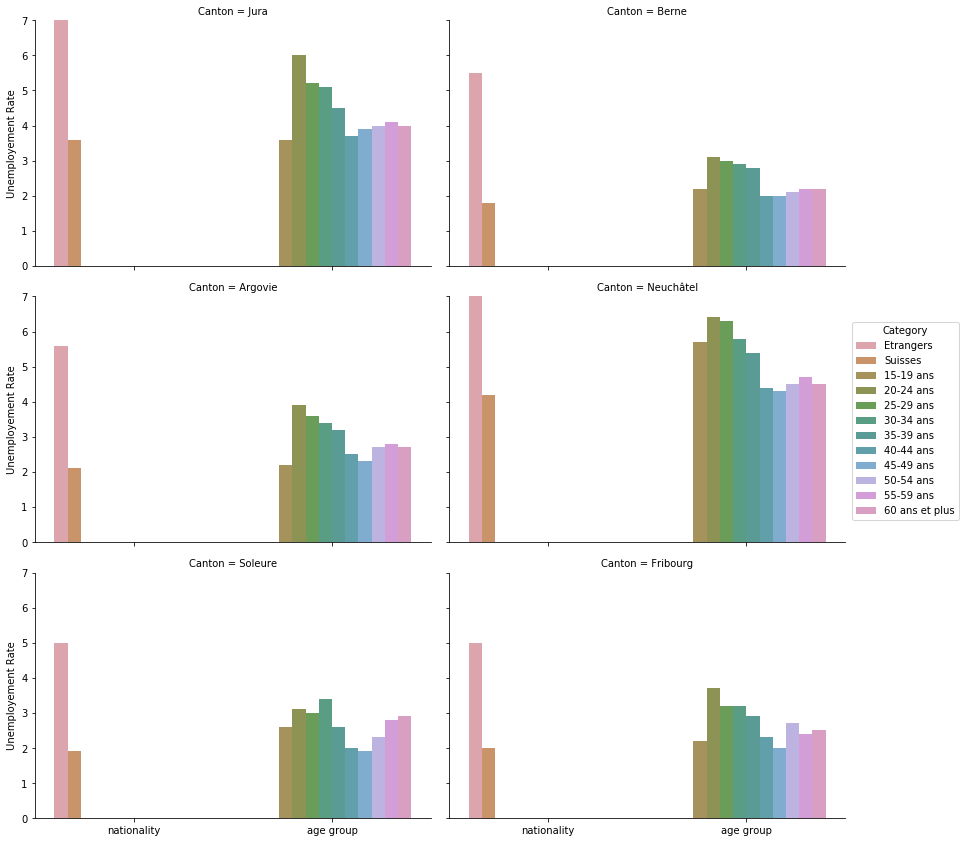

In [54]:
def plot_barplot_by_canton(canton_names):
    """
        Plot the barplot allowing to compare the different unemployement rate we have for each canton        
    """
    # we geather from each df the information regarding the interesting canton
    # then we store it into a concated dataframe before ploting it with seaborn
    df_to_plot = pd.DataFrame(columns=unemployement_df_age_groups.reset_index().columns)
    for canton_name in canton_names:
        df = unemployement_df_age_groups.reset_index()
        age_group_df = df[df.Canton == canton_name].copy()
        df = unemployement_df_nationality.reset_index()
        nationality_df = df[df.Canton == canton_name].copy()
        # we add one column to distinguish age group/nationality and we concat the 2
        age_group_df['label'] = 'age group'
        nationality_df['label'] = 'nationality'
        concated_df = pd.concat([nationality_df, age_group_df], axis=0)
        df_to_plot = pd.concat([df_to_plot, concated_df], axis=0)

    ax = sns.factorplot(x='label', y='Taux de chômage', hue='Category', data=df_to_plot,
                        kind='bar', saturation=.5, aspect=1.5, 
                        col="Canton", col_wrap=2)
    _ = (ax.set_axis_labels("", "Unemployement Rate")
           .set(ylim=(0, 7)))
    
plot_barplot_by_canton(worst_canton_name)

Then we do the same for the best performing canton.

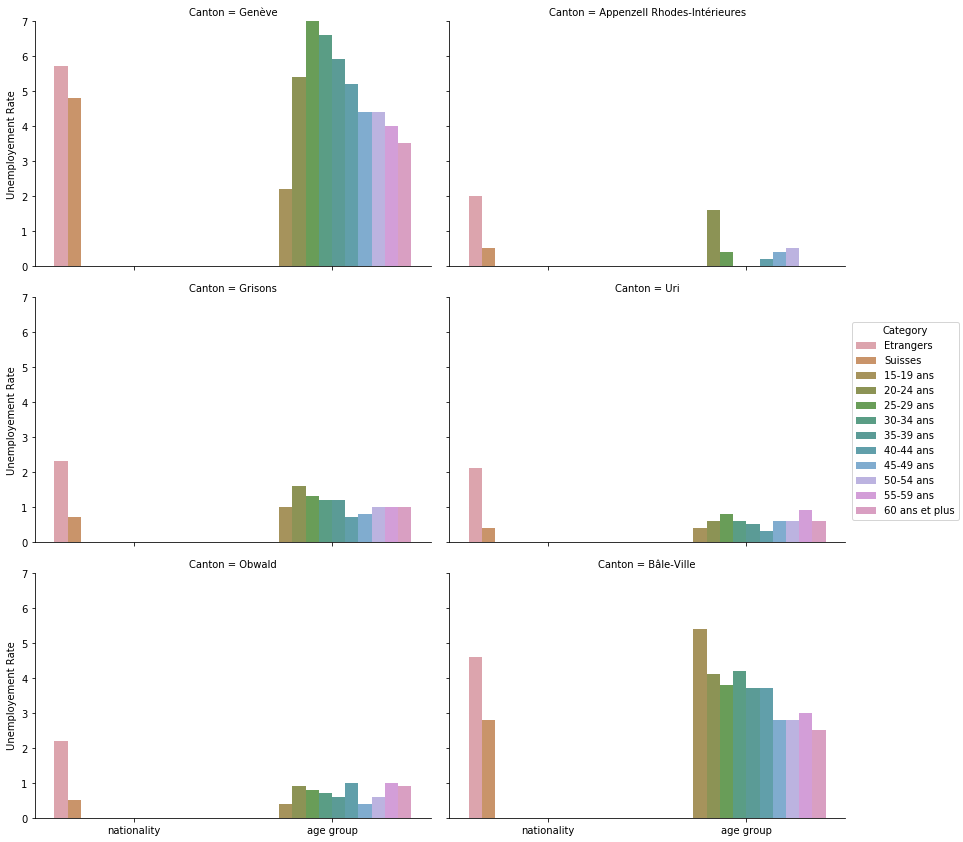

In [55]:
plot_barplot_by_canton(best_canton_name)

From this we can see that the best performing canton in terms of difference foreigners/Swiss tends to have less difference between the different age group than for the worst performing canton. It is also possible that this is more correlated to the unemployement rate in general howevever for Geneva which is the canton with the less difference between Swiss and foreigners we can observe a nice decrease of the unemployement rate when the age increase.